<a href="https://colab.research.google.com/github/GalaRusina/analisis_de_busquedas_Google_Search/blob/main/Proyecto_an%C3%A1lisis_de_busquedas_Google_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de búsquedas en Google**

Cada día se realizan aproximadamente 3.500 millones de búsquedas en Google, lo que significa que cada segundo se realizan aproximadamente 40.000 búsquedas en Google. 

Así que la búsqueda en Google es un gran caso de uso para el análisis de datos basados en las consultas de búsqueda. 

Con esto en mente, en este proyecto,haremos un análisis de las búsquedas de Google con lo aprendido hasta ahora.

Google Trends es una herramienta de Goole que puede utilizarse para la analizar las búsquedas en Google.

Google Trends proporciona una API que se puede utilizar para analizar las búsquedas diarias en Google.

Esta API es conocida como **pytrends**, puedes instalarla fácilmente en tus sistemas utilizando el comando pip; 

`pip install pytrends`

Una vez instalada, vamos a comenzar a analizar las búsquedas de Google:

In [1]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=92587b0a677fea92c643792de9419edb7636d2d7503c84f380fa4bc3f777215b
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


Importamos las librerías necesarias

In [2]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trends = TrendReq()
import seaborn as sns

In [3]:
%matplotlib inline

In [22]:
import datetime

Vamos a crear un dataframe con el top de países con más búsquedas de "Machine Learning":

In [4]:
# usamos la librería trends para buscar por las keywords dadas
trends.build_payload(kw_list=["Machine Learning"])
# nos quedamos con los datos por región
data = trends.interest_by_region()

# 1. Mostramos el top 10
Ordénamos por la columna Machine Learning y mostramos los 10 primeros valores.
.

In [5]:
data_orden = data.sort_values(by='Machine Learning', ascending=False)

data_10 = data_orden.head(10).reset_index()
data_10


,geoName,Machine Learning
0,China,100
1,Singapore,46
2,Ethiopia,43
3,St. Helena,34
4,India,33
5,Hong Kong,24
6,Pakistan,24
7,Tunisia,23
8,South Korea,23
9,Nepal,21


In [ ]:
data_orden


# 2. Creamos un gráfico de barras


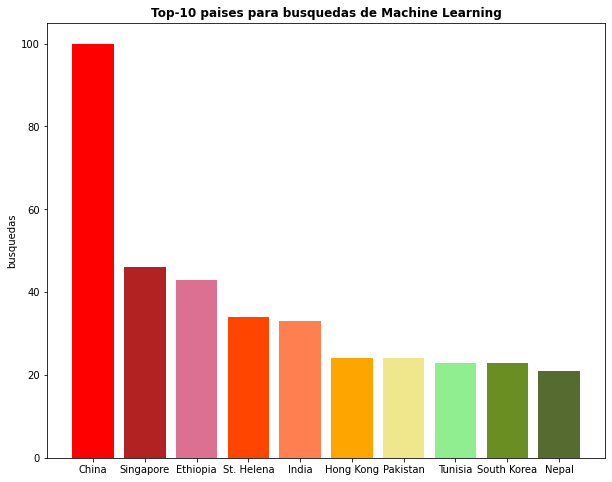

In [30]:
plt.figure(figsize=(10,8))
plt.subplot()
plt.bar(data_10['geoName'], data_10['Machine Learning'],color=['red','#B22222','#DB7093','#FF4500','#FF7F50','#FFA500','#F0E68C','#90EE90','#6B8E23','#556B2F'], edgecolor='none')
plt.title('Top-10 paises para busquedas de Machine Learning', fontweight='bold')
plt.ylabel('busquedas')
plt.show()



# 3. Búsquedas en USA por años

Como todos sabemos, el machine learning ha sido el centro de atención de muchas empresas y estudiantes durante los últimos 3-4 años, así que echemos un vistazo a la tendencia de las búsquedas para ver cómo el total de consultas de búsqueda basadas en "Machine Learning" aumentó o disminuyó en Google:

In [15]:
# obtenemos los datos con la API
data = TrendReq(hl='en-US', tz=360) # idioma y país
data.build_payload(kw_list=['Machine Learning']) # keyword Machine Learning
data = data.interest_over_time() # con tiempo

Creamos un gráfico en el que mostramos los años en el eje X y las búsquedas en el eje Y.

In [16]:
data_US = TrendReq(hl='en-US', tz=360) # idioma y país
data_US.build_payload(kw_list=['Machine Learning']) # keyword Machine Learning
data_US = data_US.interest_over_time() # con tiempo

data_US = data_US.resample('1Y', closed='right').sum() # reajustamos las fechas por año
data_US = data_US.reset_index()


In [21]:
data_US

,date,Machine Learning,isPartial
0,2017-12-31,539,0
1,2018-12-31,3007,0
2,2019-12-31,3290,0
3,2020-12-31,3173,0
4,2021-12-31,2802,0
5,2022-12-31,3684,1


In [23]:
data_US['date'] = data_US['date'].dt.year #cambiamos date dejando solo el año

In [24]:
data_US

,date,Machine Learning,isPartial
0,2017,539,0
1,2018,3007,0
2,2019,3290,0
3,2020,3173,0
4,2021,2802,0
5,2022,3684,1


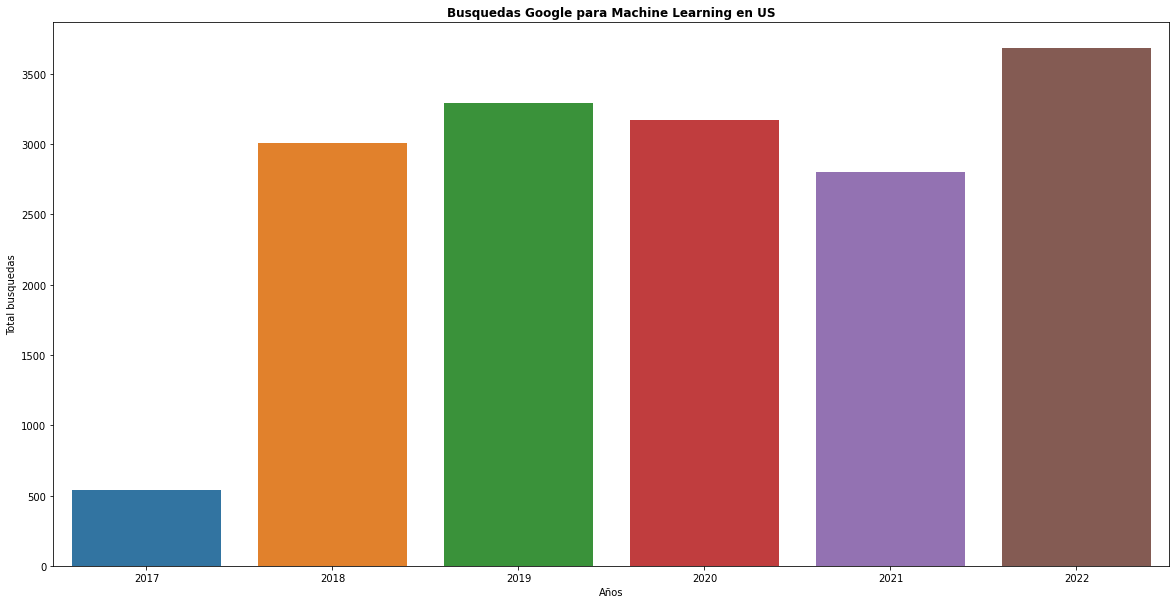

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x = "date", y = "Machine Learning", data = data_US)
plt.title('Busquedas Google para Machine Learning en US', fontweight='bold')
plt.xlabel('Años')
plt.ylabel('Total busquedas')

plt.show()

<Figure size 720x576 with 0 Axes>

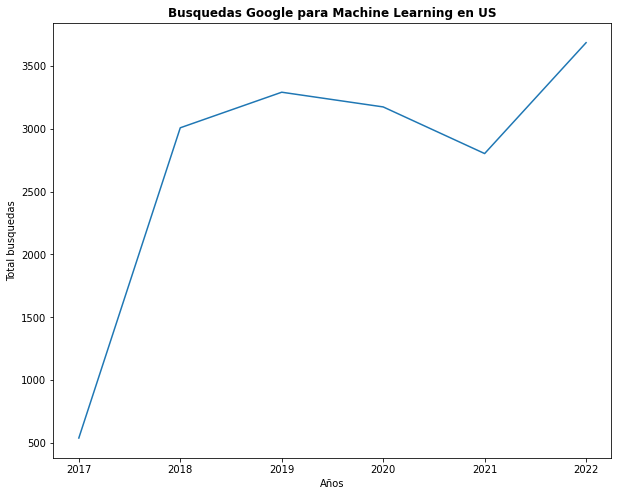

In [48]:
fig = plt.subplots(figsize=(10,8))
plt.plot(data_US["date"], data_US["Machine Learning"])

plt.title('Total Google Searches for Machine Learning', fontweight='bold')
plt.title('Busquedas Google para Machine Learning en US', fontweight='bold')
plt.xlabel('Años')
plt.ylabel('Total busquedas')
plt.show()

#Búsquedas en España por años

In [35]:
data_Sp = TrendReq(hl='sp-SP', tz=360) # idioma y país
data_Sp.build_payload(kw_list=['aprendizaje automático']) 
data_Sp = data_Sp.interest_over_time() # con tiempo


In [37]:
data_Sp_anual =  data_Sp.resample('1Y', closed='right').sum()
data_Sp_anual = data_Sp_anual.reset_index()

data_Sp_anual['date'] = data_Sp_anual['date'].dt.year
data_Sp_anual

,date,aprendizaje automático,isPartial
0,2017,131,0
1,2018,433,0
2,2019,389,0
3,2020,630,0
4,2021,1023,0
5,2022,1421,1


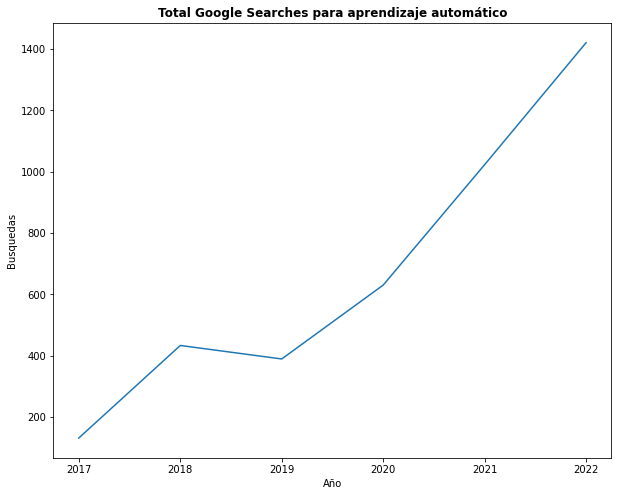

In [41]:
plt.figure(figsize=(10,8))
plt.plot(data_Sp_anual["date"], data_Sp_anual["aprendizaje automático"])
plt.title('Total Google Searches para aprendizaje automático', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Busquedas')
plt.show()

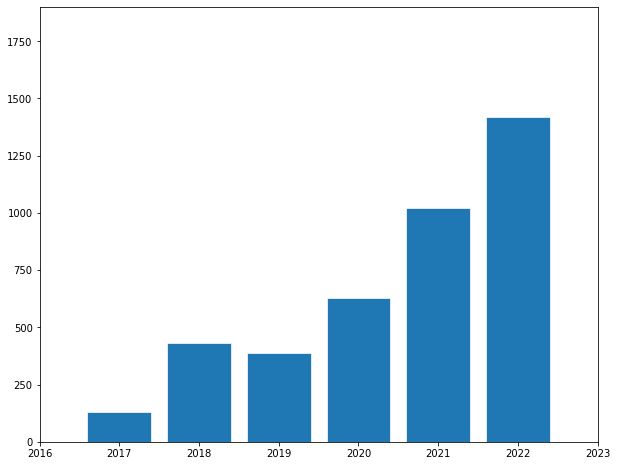

<Figure size 720x576 with 0 Axes>

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
plt.figure(figsize=(10,8))
ax.bar(data_Sp_anual['date'], data_Sp_anual['aprendizaje automático'], width=0.8, edgecolor="white", linewidth=0.7)

ax.set(xlim=(2016, 2023), 
       ylim=(0, 1900))


plt.show()

Busqueda en España 'redes neuronales'

In [57]:
data_Sp_redes_neur = TrendReq(hl='sp-SP', tz=360) # idioma y país
data_Sp_redes_neur.build_payload(kw_list=['redes neuronales']) 
data_Sp_redes_neur = data_Sp_redes_neur.interest_over_time() # con tiempo
data_Sp_redes_neur =  data_Sp_redes_neur.resample('1Y', closed='right').sum()
data_Sp_redes_neur = data_Sp_redes_neur.reset_index()
data_Sp_redes_neur['date']=data_Sp_redes_neur['date'].dt.year
data_Sp_redes_neur

,date,redes neuronales,isPartial
0,2017,577,0
1,2018,2883,0
2,2019,2691,0
3,2020,2699,0
4,2021,2193,0
5,2022,3038,1


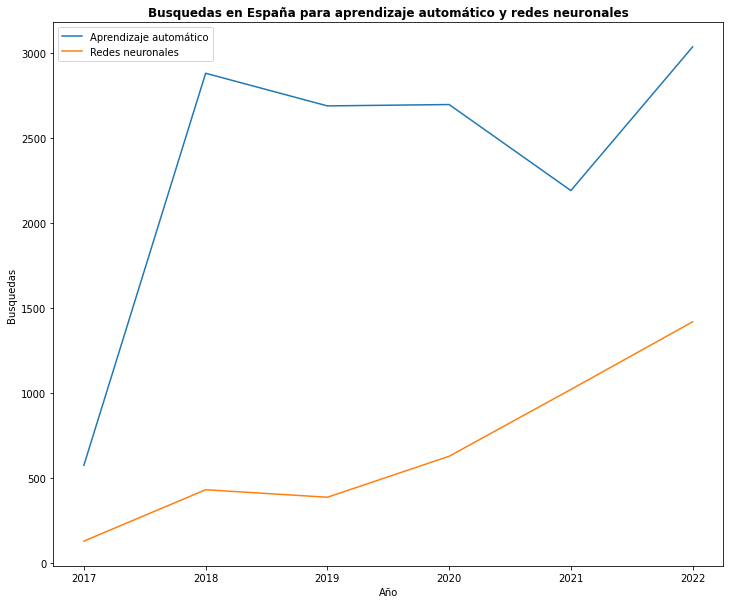

In [63]:
from seaborn.widgets import color_palette
plt.figure(figsize=(12,10))
sns.lineplot(data=data_Sp_redes_neur, x='date', y='redes neuronales')
sns.lineplot(data=data_Sp_anual, x='date', y='aprendizaje automático')
plt.title('Busquedas en España para aprendizaje automático y redes neuronales', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Busquedas')
plt.legend(labels=["Aprendizaje automático","Redes neuronales"])

plt.show()

# Conclusiones

1. El region con más búsquedas de "machine learning" es China.
2. En Estados Unidos se obtenido mas búsquedas de "machine learning" en 2022
3. En España tambiem la mayor cantidad de busquedas de "machine learning" y "redes neuronales" esta en 2022 y hay clara tendencia de crecimiento en las búsquedas de "redes neuronales".
